# Student Wellbeing Data Cleaning & Analysis

This notebook shows how to clean and look at a student wellbeing dataset.

## Import Libraries

We use pandas for data, seaborn and matplotlib for charts.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

Read the CSV file with student wellbeing info.

In [2]:
df = pd.read_csv("student_wellbeing_dataset.csv")

## Show the Data

See the first few rows.

In [3]:
df

,Student_ID,Hours_Study,Sleep_Hours,Screen_Time,Attendance,Extracurricular,Stress_Level,CGPA
0,S9575,4.811648,NaN,NaN,NaN,No,Low,5.749837
1,S4742,4.643357,5.902211,4.275331,60.854180,No,Medium,8.020313
2,S7231,3.272853,NaN,NaN,NaN,No,Medium,8.937845
3,S6723,2.792323,6.329910,3.066620,73.636493,No,Low,6.927904
4,S9987,2.771713,7.811576,4.567633,86.979984,No,Medium,5.095918
...,...,...,...,...,...,...,...,...
10195,S6734,2.851835,9.359704,5.166002,95.550127,Yes,Medium,6.634090
10196,S6191,3.917415,3.728237,3.945102,83.394850,No,Low,7.610555
10197,S6390,2.601171,6.048218,9.364536,83.437247,No,Medium,6.720396
10198,S1860,4.405846,6.775546,4.944032,79.382411,No,Low,4.946345


## Summary

Show stats for the numbers in the data.

In [4]:
df.describe()

,Hours_Study,Sleep_Hours,Screen_Time,Attendance,CGPA
count,10200.000000,9500.000000,9500.000000,9500.000000,10200.000000
mean,4.012449,7.019559,4.995607,79.802502,7.017243
std,1.963683,1.496041,1.949686,9.838667,1.203910
min,0.000000,3.000000,1.000000,40.000000,2.010719
25%,2.645926,6.005335,3.607348,72.999310,6.193948
50%,3.996457,7.023379,4.994795,79.873461,7.024870
75%,5.338464,8.041188,6.334839,86.753910,7.846489
max,11.852475,12.000000,12.383249,100.000000,10.000000


## Fill Missing Values

Fill missing numbers with the median.

In [5]:
# For numerical columns, fill with the median
for col in ['Sleep_Hours', 'Screen_Time', 'Attendance', 'CGPA']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace =True)

C:\Users\archi\AppData\Local\Temp\ipykernel_42672\832624707.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace =True)
C:\Users\archi\AppData\Local\Temp\ipykernel_42672\832624707.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

## Check for Duplicates

Count duplicate rows.

In [6]:
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 200


## Remove Duplicates

Drop duplicate rows.

In [7]:
df.drop_duplicates(inplace=True)
df

,Student_ID,Hours_Study,Sleep_Hours,Screen_Time,Attendance,Extracurricular,Stress_Level,CGPA
0,S9575,4.811648,7.023379,4.994795,79.873461,No,Low,5.749837
1,S4742,4.643357,5.902211,4.275331,60.854180,No,Medium,8.020313
2,S7231,3.272853,7.023379,4.994795,79.873461,No,Medium,8.937845
3,S6723,2.792323,6.329910,3.066620,73.636493,No,Low,6.927904
4,S9987,2.771713,7.811576,4.567633,86.979984,No,Medium,5.095918
...,...,...,...,...,...,...,...,...
10195,S6734,2.851835,9.359704,5.166002,95.550127,Yes,Medium,6.634090
10196,S6191,3.917415,3.728237,3.945102,83.394850,No,Low,7.610555
10197,S6390,2.601171,6.048218,9.364536,83.437247,No,Medium,6.720396
10198,S1860,4.405846,6.775546,4.944032,79.382411,No,Low,4.946345


## Make Categories Numeric

Change 'Extracurricular' and 'Stress_Level' to numbers.

In [8]:

df['Extracurricular'] = df['Extracurricular'].map({'Yes': 1, 'No': 0})

df['Stress_Level'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

df

,Student_ID,Hours_Study,Sleep_Hours,Screen_Time,Attendance,Extracurricular,Stress_Level,CGPA
0,S9575,4.811648,7.023379,4.994795,79.873461,0,0,5.749837
1,S4742,4.643357,5.902211,4.275331,60.854180,0,1,8.020313
2,S7231,3.272853,7.023379,4.994795,79.873461,0,1,8.937845
3,S6723,2.792323,6.329910,3.066620,73.636493,0,0,6.927904
4,S9987,2.771713,7.811576,4.567633,86.979984,0,1,5.095918
...,...,...,...,...,...,...,...,...
10195,S6734,2.851835,9.359704,5.166002,95.550127,1,1,6.634090
10196,S6191,3.917415,3.728237,3.945102,83.394850,0,0,7.610555
10197,S6390,2.601171,6.048218,9.364536,83.437247,0,1,6.720396
10198,S1860,4.405846,6.775546,4.944032,79.382411,0,0,4.946345


## Add Total Hours

Make a new column that adds study, sleep, and screen hours.

In [9]:
df['Total_Hours']=df['Hours_Study'] + df['Sleep_Hours'] + df['Screen_Time']
df.describe()

,Hours_Study,Sleep_Hours,Screen_Time,Attendance,Extracurricular,Stress_Level,CGPA,Total_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.013186,7.019750,4.995566,79.806050,0.394100,0.904200,7.015259,16.028503
std,1.965459,1.458157,1.900314,9.589534,0.488681,0.700337,1.202670,3.142140
min,0.000000,3.000000,1.000000,40.000000,0.000000,0.000000,2.010719,5.425254
25%,2.654819,6.065735,3.706550,73.409189,0.000000,0.000000,6.192039,13.915900
50%,3.994810,7.023379,4.994795,79.873461,0.000000,1.000000,7.023334,15.982328
75%,5.342162,7.970439,6.249825,86.301224,1.000000,1.000000,7.841834,18.134899
max,11.852475,12.000000,12.383249,100.000000,1.000000,2.000000,10.000000,27.698195


## Remove Impossible Total Hours

Keep only rows where total hours are 24 or less.

In [10]:
df = df[df['Total_Hours'] <= 24]

## Charts

Show charts for study hours, sleep, screen time, and CGPA.

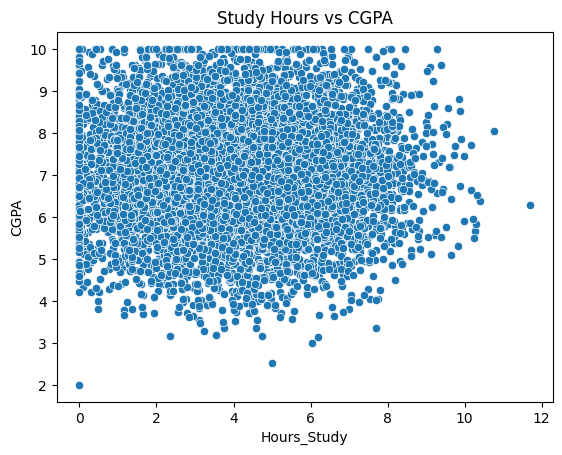

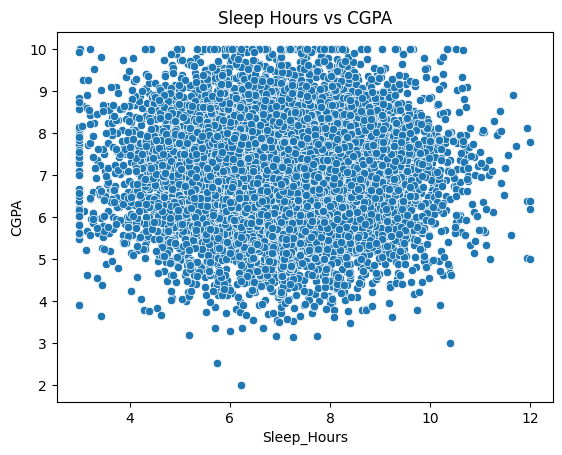

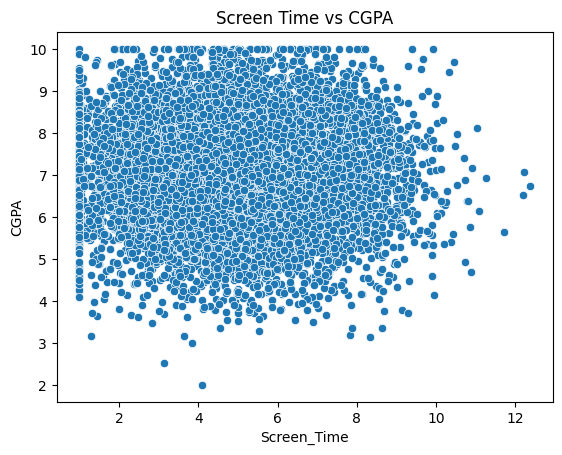

In [13]:
# Study hours vs CGPA
sns.scatterplot(x="Hours_Study", y="CGPA", data=df)
plt.title("Study Hours vs CGPA")
plt.show()

# Sleep vs CGPA
sns.scatterplot(x="Sleep_Hours", y="CGPA", data=df)
plt.title("Sleep Hours vs CGPA")
plt.show()

# Screen time vs CGPA
sns.scatterplot(x="Screen_Time", y="CGPA", data=df)
plt.title("Screen Time vs CGPA")
plt.show()




## CGPA and Extracurricular

Compare average CGPA for students who do and do not join extracurriculars.

In [14]:
# Calculate average CGPA for both groups
avg_cgpa_yes = df[df['Extracurricular'] == 1]['CGPA'].mean()
avg_cgpa_no = df[df['Extracurricular'] == 0]['CGPA'].mean()

print("Avg CGPA of those who participated in Extracurricular = ", avg_cgpa_yes, "\nAvg CGPA of those who did not participated in Extracurricular = ", avg_cgpa_no)

Avg CGPA of those who participated in Extracurricular =  7.02422514754853 
Avg CGPA of those who did not participated in Extracurricular =  7.0110219744581785


## CGPA and Stress Level

See average CGPA for each stress level.

In [15]:
# Calculate average CGPA for each stress level
stress_labels = {0: 'Low', 1: 'Medium', 2: 'High'}
avg_cgpa_stress = df.groupby('Stress_Level')['CGPA'].mean().reset_index()
avg_cgpa_stress['Stress_Level'] = avg_cgpa_stress['Stress_Level'].map(stress_labels)

print(avg_cgpa_stress)

  Stress_Level      CGPA
0          Low  7.015153
1       Medium  7.031775
2         High  6.979166


## Save Cleaned Data

Save the cleaned data to a CSV file.

In [16]:
df.to_csv('Cleaned Dataset', index=False)

# Insights

1. Students who study more tend to have higher CGPA.
2. More sleep is linked to better CGPA.
3. More screen time is linked to lower CGPA.
4. Students in extracurriculars have a bit higher CGPA.
5. More stress usually means lower CGPA.